<p><b>The Ballon d’Or is an annual football prize presented by France Football. The award, voted for by football journalists, is given to the male player who was deemed to have played the best football over the previous 12 months.</b></p>

<img src="https://pbs.twimg.com/media/EdXidIDXsAIi8u4?format=jpg&name=medium">

##### Import all necessary libraries

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import Image

In [15]:
# pip install WordCloud

### Read the csv file in new dataframe

In [16]:
df =pd.read_csv('BallonDorOutput.csv', encoding='utf8')

### Data Exploration!

In [17]:
df.head()

,year,player,Nationality,club
0,2021,Lionel Messi,Argentina,Paris Saint-Germain F.C.
1,2019,Lionel Messi,Argentina,Barcelona
2,2018,Luka Modric,Croatia,Real Madrid
3,2017,Cristiano Ronaldo,Portugal,Real Madrid
4,2016,Cristiano Ronaldo,Portugal,Real Madrid


In [18]:
df.tail()

,year,player,Nationality,club
60,1960,Luis Suárez,Spain,Barcelona
61,1959,Alfredo Di Stéfano,Spain,Real Madrid
62,1958,Raymond Kopa,France,Real Madrid
63,1957,Alfredo Di Stéfano,Spain,Real Madrid
64,1956,Stanley Matthews,England,Blackpool


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         65 non-null     int64 
 1   player       65 non-null     object
 2   Nationality  65 non-null     object
 3   club         65 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


In [20]:
df.columns

Index(['year', 'player', 'Nationality', 'club'], dtype='object')

In [21]:
df.isna().sum()

year           0
player         0
Nationality    0
club           0
dtype: int64

#### Which club's players won the most?

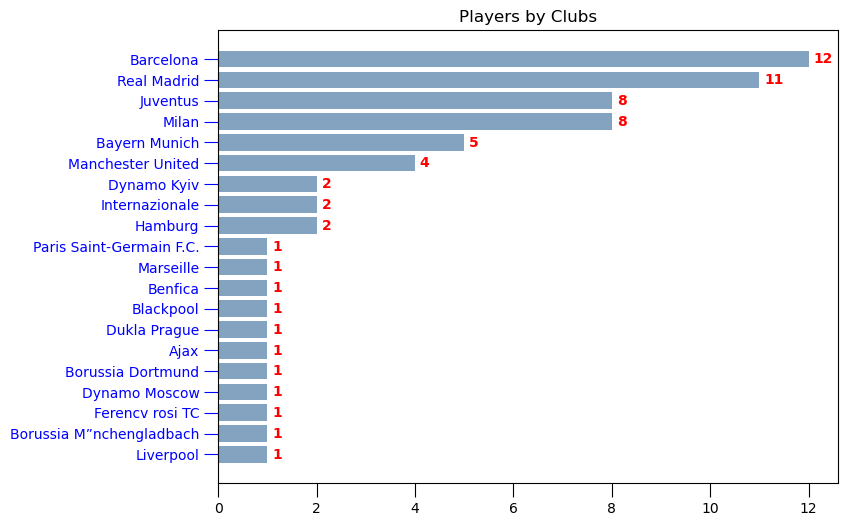

In [22]:
clubs=df.club.value_counts().index
no_players=df.club.value_counts().values

plt.figure(figsize=(8,6), dpi=100)
plt.title("Players by Clubs")
plt.barh(y=clubs, width=no_players, align='center',color=(0.2, 0.4, 0.6, 0.6))

#Set tick colors:
plt.gca().invert_yaxis()
plt.tick_params(axis='x', colors='black', size=10)
plt.tick_params(axis='y', colors='blue', size=10)

# display the value of the bar on each bar 
for i, v in enumerate(no_players):
    plt.text(v+0.1, i+0.2, str(v), color='r', fontweight='bold')

plt.show()

#### Which country's players won the most?


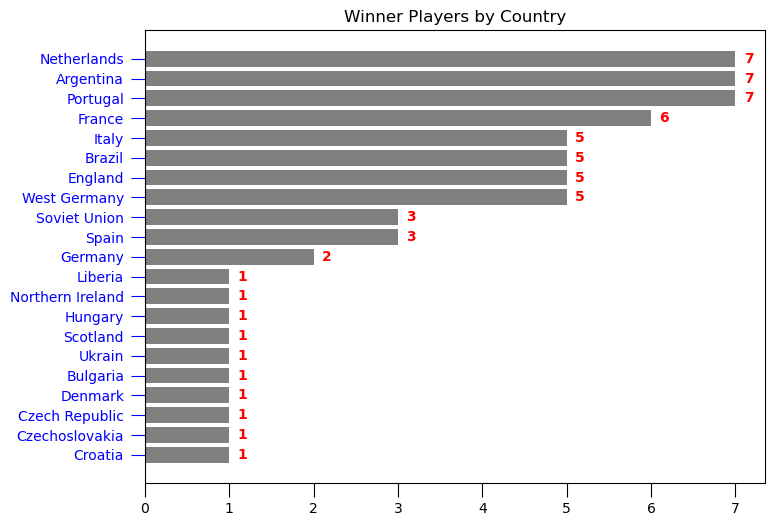

In [23]:
countries =df.Nationality.value_counts().index
no_players=df.Nationality.value_counts().values

plt.figure(figsize=(8,6),dpi=100)
plt.title("Winner Players by Country")
plt.barh(y=countries, width=no_players, align='center',color="grey",)

#Set tick colors:
plt.gca().invert_yaxis() # labels read top-to-bottom
plt.tick_params(axis='x', colors='black',size=10)
plt.tick_params(axis='y', colors='blue', pad=5,size=10,)


# display the value of the bar on each bar 
for i, v in enumerate(no_players):
    plt.text(v + 0.1, i + 0.2, str(v), color='r', fontweight='bold')

plt.show()

### Players who have won the FIFA Ballon d'Or more than once between 1956 and 2021

In [29]:
won_more_than_once = df.player.value_counts()
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [25]:
x=won_more_than_once[:10].values
y=won_more_than_once[:10].index

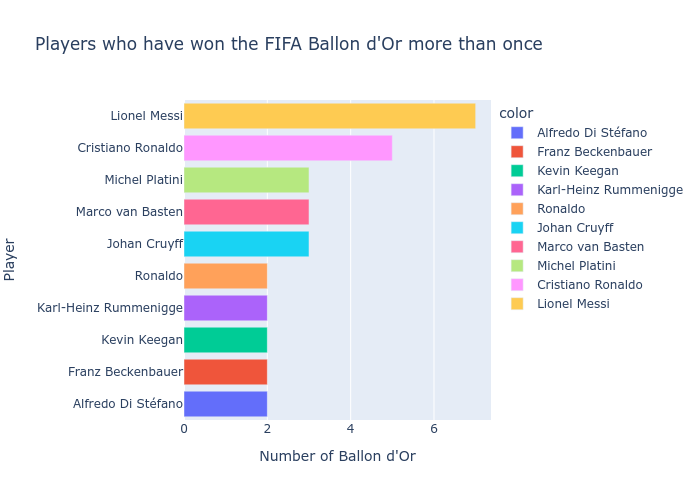

In [43]:
h_bar = px.bar(x=x[::-1],
               y=y[::-1],
               orientation='h',
               color=y[::-1],
               title="Players who have won the FIFA Ballon d'Or more than once ")

h_bar.update_layout(xaxis_title="Number of Ballon d'Or", 
                    yaxis_title='Player',
                    coloraxis_showscale=False)

# h_bar.show()
h_bar.write_image("images/fig1.png")
Image(filename="images/fig1.png") 

### Create the wordcloud

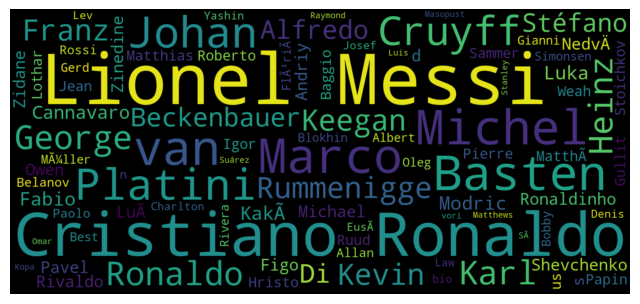

In [46]:
# Create a list of word
players_name = list(df.player)
str1 = ' '.join(players_name)

# Create the wordcloud object
wordcloud = WordCloud(width=1480,
                      height=680, 
                      margin=10,).generate(str1)

plt.figure(figsize=(8,6),dpi=100)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()